In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
pd.set_option('mode.chained_assignment', None)
import geopandas as gpd
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.feature_selection import mutual_info_regression

In [2]:
# Loading the sea level anomaly data compiled from netcdf4 files

df = pd.read_csv("D:/UGP/datasets/sla.csv")
s1 = df['indian_ocean']
s2 = df['arabian_sea']
s3 = df['bay_of_bengal']

In [3]:
# Loading the precipitation data complied from IMD Dataset

df = pd.read_csv("/UGP/datasets/precip.csv")
df = df.iloc[:-3]
r1_precip = df['r1']
r2_precip = df['r2']
r3_precip = df['r3']
r4_precip = df['r4']

time = pd.DatetimeIndex(df['time']).unique()

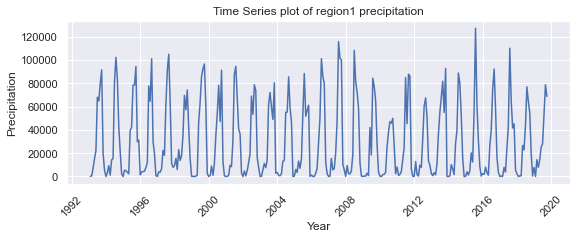

In [4]:
# Time Series plot for precipitation regime of region 1

fig,ax = plt.subplots(figsize=(9,3))

plt.plot(time,r1_precip, 'b') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of region1 precipitation')
plt.show()

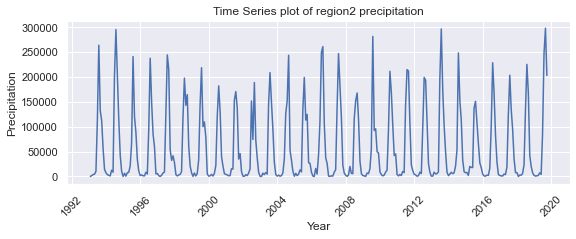

In [5]:
# Time Series plot for precipitation regime of region 2

fig,ax = plt.subplots(figsize=(9,3))
plt.plot(time,r2_precip, 'b') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of region2 precipitation')
plt.show()

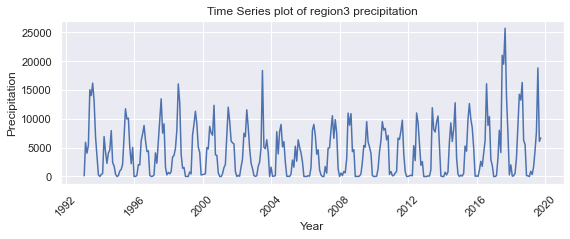

In [6]:
# Time Series plot for precipitation regime of region 3

fig,ax = plt.subplots(figsize=(9,3))
plt.plot(time,r3_precip, 'b') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of region3 precipitation')
plt.show()

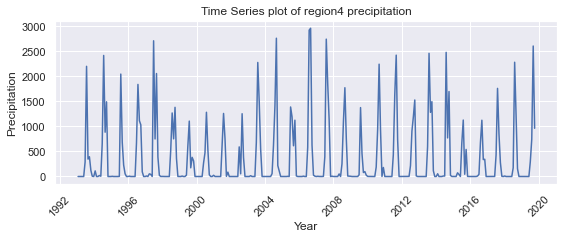

In [7]:
# Time Series plot for precipitation regime of region 4

fig,ax = plt.subplots(figsize=(9,3))
plt.plot(time,r4_precip, 'b') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of region4 precipitation')
plt.show()

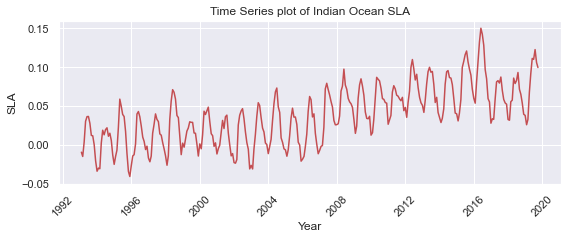

In [8]:
# Time Series plot for Sea Level Anomaly regime for Indain Ocean

fig,ax = plt.subplots(figsize=(9,3))
plt.plot(time,s1, 'r') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('SLA')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of Indian Ocean SLA')
plt.show()

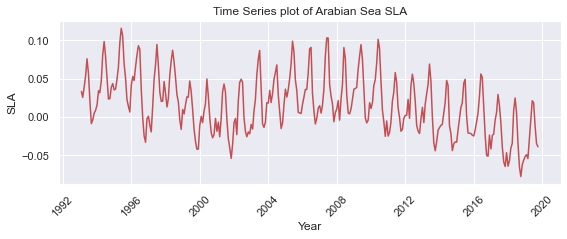

In [9]:
# Time Series plot for Sea Level Anomaly regime for Arabian Sea

fig,ax = plt.subplots(figsize=(9,3))
plt.plot(time,s2, 'r') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('SLA')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of Arabian Sea SLA')
plt.show()

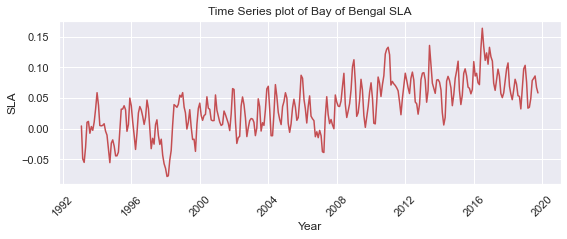

In [10]:
# Time Series plot for Sea Level Anomaly regime for Bay of Bengal

fig,ax = plt.subplots(figsize=(9,3))
plt.plot(time,s3, 'r') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('SLA')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of Bay of Bengal SLA')
plt.show()

In [11]:
# ONI ENSO INDEX

col = np.arange(13)
data = pd.DataFrame(np.loadtxt("/UGP/datasets/oni.txt"),columns=col).set_index(0).stack()
data = pd.DataFrame(data).rename(columns = {0:"oni"})
data = data.reset_index().rename(columns = {0:"year","level_1":"month"})
data = data[(data["year"] > 1992) & (data["year"] <= 2019)]
data = data[:-3]


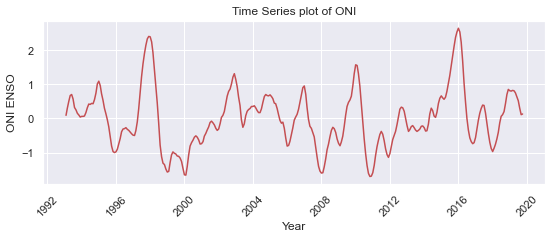

In [12]:
# Time Series plot for ENSO Index

fig,ax = plt.subplots(figsize=(9,3))
plt.plot(time,data['oni'], 'r') # 'r' is the color red
plt.xlabel('Year')
plt.ylabel('ONI ENSO')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Time Series plot of ONI')
plt.show()

In [13]:
# Loading the dataset into a single data frame

df = pd.DataFrame({"precip_SE":np.array(r1_precip),
                   "precip_SW":np.array(r2_precip),
                   "precip_NE":np.array(r3_precip),
                   "precip_NW":np.array(r4_precip),
                   "sla_io":np.array(s1),
                   "sla_as":np.array(s2),
                   "sla_bb":np.array(s3),
                   "enso":np.array(data['oni'])})

In [14]:
# Setting the time column as index of df

df.set_index(time,inplace=True)

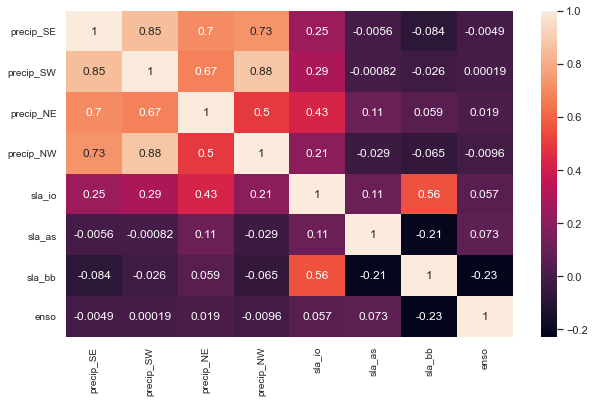

In [15]:
# Heatmap between all the variables of df

corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,annot = True,annot_kws={'size':12})
heatmap = plt.gcf()
heatmap.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

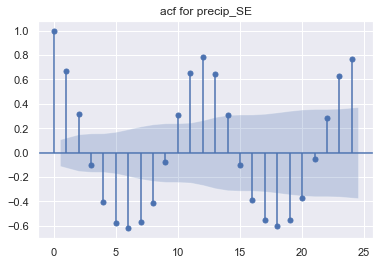

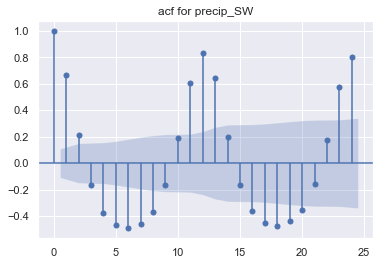

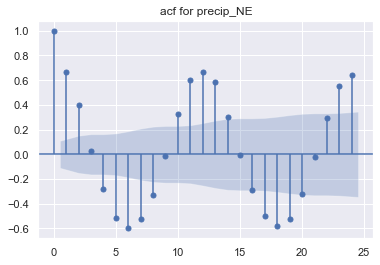

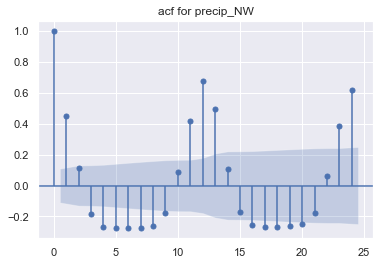

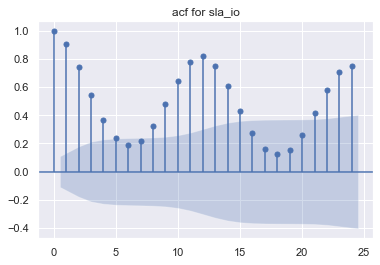

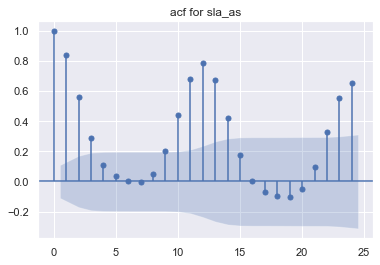

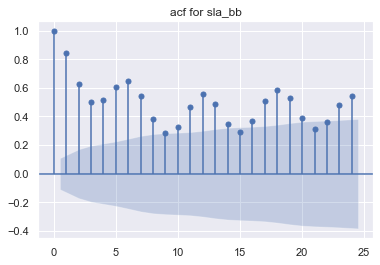

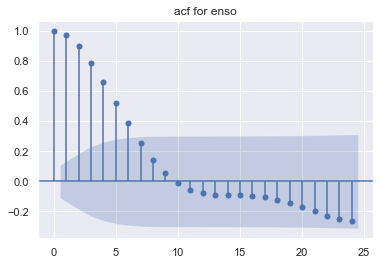

In [16]:
# Plotting the auto-correlation function for 24 months lag

for i in df:
    plot_acf(df[i],lags=24)
    plt.title("acf for "+i )
    plt.show()

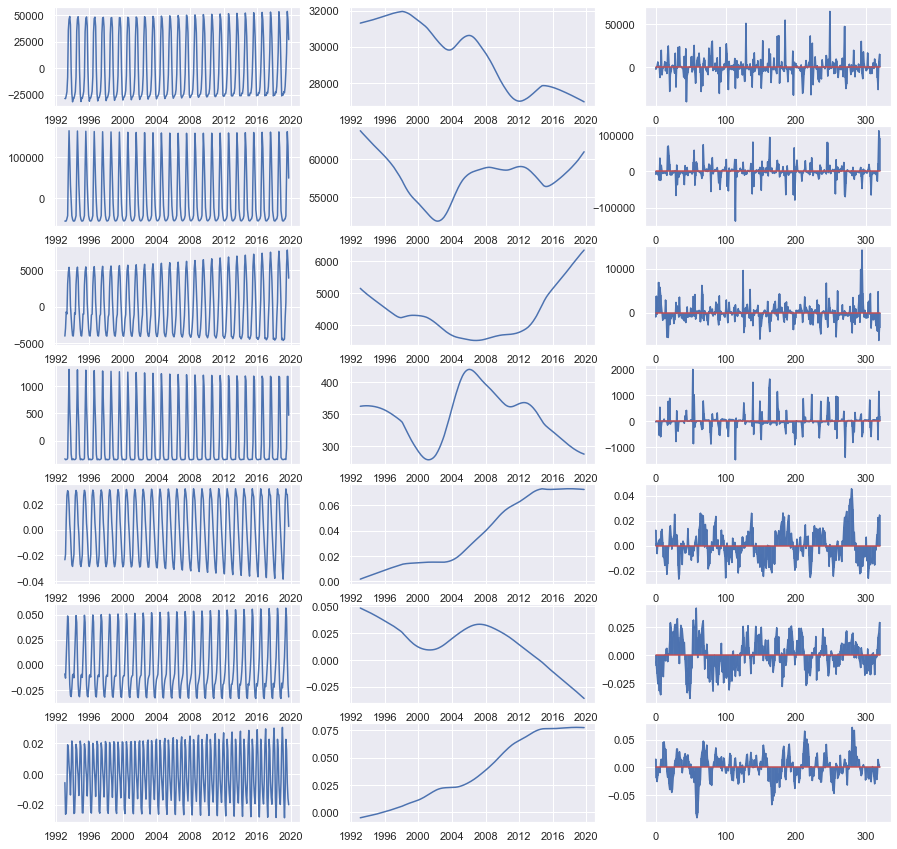

<Figure size 1008x432 with 0 Axes>

In [26]:
# Distributing signal into its seasonality, trend and residuals and storing the residuals in transformed data
 
fig, ax = plt.subplots(7,3,figsize=(15, 15))
plt.figure(figsize=(14,6))
transform_data = pd.DataFrame()
for i in range(7): 
    stl = STL(df.iloc[:,i], period = 12,seasonal=61 , trend = 121)
    res = stl.fit()
    transform_data[df.columns[i]] = res.resid
    ax[i,0].plot(res.seasonal)
    ax[i,1].plot(res.trend)
    ax[i,2].stem(res.resid , markerfmt='')
transform_data[df.columns[7]] = df.iloc[:,7] 

In [27]:
transform_data.describe()

,precip_SE,precip_SW,precip_NE,precip_NW,sla_io,sla_as,sla_bb,enso
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,27.603709,-168.564206,-35.932864,0.514820,0.000188,0.000216,0.000117,-0.003614
std,13134.526781,24704.065422,2349.756308,362.911036,0.012941,0.015063,0.024171,0.859626
min,-40903.680566,-136685.819884,-6317.216107,-1485.028820,-0.026615,-0.038703,-0.090064,-1.700000
25%,-5247.091972,-6497.515595,-1177.569335,-65.432823,-0.008894,-0.010564,-0.014257,-0.570000
50%,-1183.815367,-1464.692822,-227.353051,-14.972398,-0.001212,-0.000130,-0.000034,-0.060000
75%,4091.609698,5208.067385,593.626430,44.091380,0.008416,0.010750,0.015167,0.470000
max,64967.165481,112122.985760,14221.744067,1981.614390,0.045448,0.041840,0.071748,2.640000


In [35]:
# This part is for doing a augmented dickey fuller test on transformed time series for testing stationarity
# https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/ 

def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
print('Augmented Dickey-Fuller Test: Precipitation SE Time Series')
augmented_dickey_fuller_statistics(transform_data['precip_SE'])
print('Augmented Dickey-Fuller Test: Precipitation NW Time Series')
augmented_dickey_fuller_statistics(transform_data['precip_NW'])
print('Augmented Dickey-Fuller Test: Precipitation SW Time Series')
augmented_dickey_fuller_statistics(transform_data['precip_SW'])
print('Augmented Dickey-Fuller Test: Precipitation NE Time Series')
augmented_dickey_fuller_statistics(transform_data['precip_NE'])
print('Augmented Dickey-Fuller Test: SLA Indian Ocean Time Series')
augmented_dickey_fuller_statistics(transform_data['sla_io'])
print('Augmented Dickey-Fuller Test: SLA Bay of bengal Time Series')
augmented_dickey_fuller_statistics(transform_data['sla_bb'])
print('Augmented Dickey-Fuller Test: SLA Arabian sea Time Series')
augmented_dickey_fuller_statistics(transform_data['sla_as'])
print('Augmented Dickey-Fuller Test: ENSO Time Series')
augmented_dickey_fuller_statistics(transform_data['enso'])

Augmented Dickey-Fuller Test: Precipitation SE Time Series
ADF Statistic: -18.257024
p-value: 0.000000
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Precipitation NW Time Series
ADF Statistic: -18.519670
p-value: 0.000000
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Precipitation SW Time Series
ADF Statistic: -16.537715
p-value: 0.000000
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Precipitation NE Time Series
ADF Statistic: -9.467726
p-value: 0.000000
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: SLA Indian Ocean Time Series
ADF Statistic: -5.436748
p-value: 0.000003
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: SLA Bay of bengal Time Series
ADF Statistic: -6.225274
p-value: 0.000000
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: SLA Arabian sea Time Series
AD

In [29]:
# augmented dickey fuller test on initial time series

print('Augmented Dickey-Fuller Test: Precipitation SE Time Series')
augmented_dickey_fuller_statistics(df['precip_SE'])
print('Augmented Dickey-Fuller Test: Precipitation NW Time Series')
augmented_dickey_fuller_statistics(df['precip_NW'])
print('Augmented Dickey-Fuller Test: Precipitation SW Time Series')
augmented_dickey_fuller_statistics(df['precip_SW'])
print('Augmented Dickey-Fuller Test: Precipitation NE Time Series')
augmented_dickey_fuller_statistics(df['precip_NE'])
print('Augmented Dickey-Fuller Test: SLA Indian Ocean Time Series')
augmented_dickey_fuller_statistics(df['sla_io'])
print('Augmented Dickey-Fuller Test: SLA Bay of bengal Time Series')
augmented_dickey_fuller_statistics(df['sla_bb'])
print('Augmented Dickey-Fuller Test: SLA Arabian sea Time Series')
augmented_dickey_fuller_statistics(df['sla_as'])
print('Augmented Dickey-Fuller Test: ENSO Time Series')
augmented_dickey_fuller_statistics(df['enso'])

Augmented Dickey-Fuller Test: Precipitation SE Time Series
ADF Statistic: -4.006316
p-value: 0.001378
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Precipitation NW Time Series
ADF Statistic: -2.954670
p-value: 0.039350
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Precipitation SW Time Series
ADF Statistic: -3.395036
p-value: 0.011129
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: Precipitation NE Time Series
ADF Statistic: -4.040256
p-value: 0.001214
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: SLA Indian Ocean Time Series
ADF Statistic: -1.447160
p-value: 0.559470
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: SLA Bay of bengal Time Series
ADF Statistic: -1.499276
p-value: 0.533869
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Augmented Dickey-Fuller Test: SLA Arabian sea Time Series
ADF S

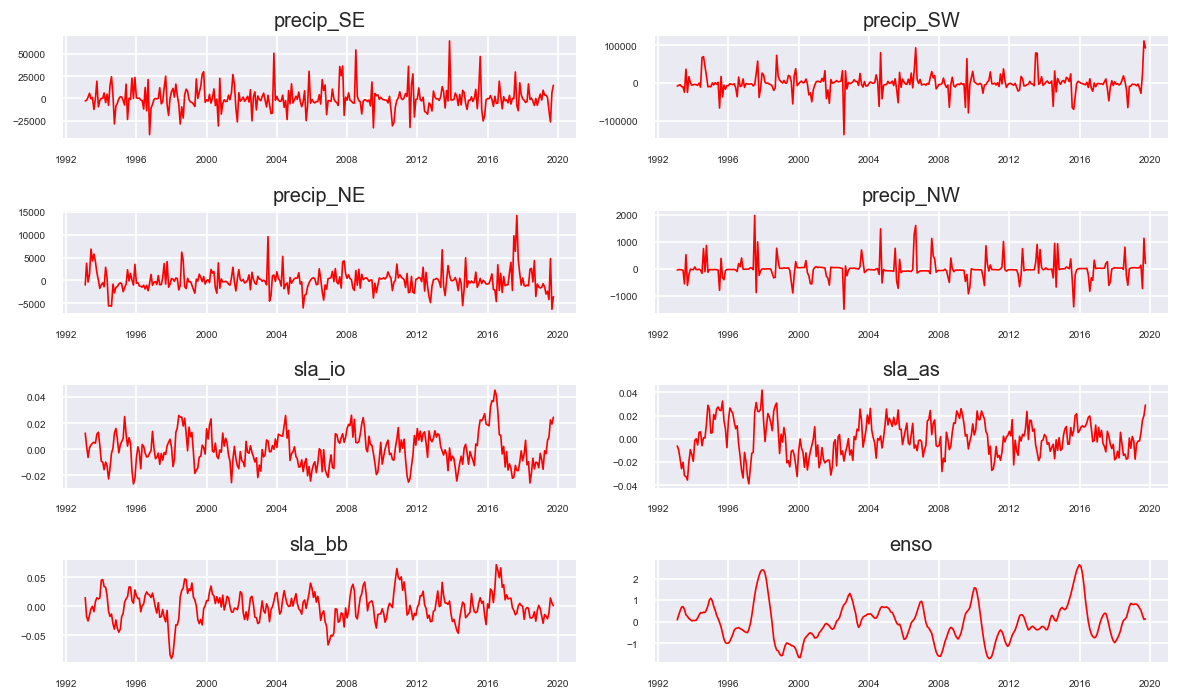

In [30]:
# Plotting the transformed time series for each variable

fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    d = transform_data[transform_data.columns[i]]
    ax.plot(d, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

In [33]:
# Performing the granger causality test on the transformed time series for max lag of 12 months
# https://www.statisticshowto.com/granger-causality/ 

maxlag=12
test = 'ssr-chi2test'
def grangers_causality_matrix(X_train, variables, test = 'ssr_chi2test', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset
grangers_causality_matrix(transform_data, variables = transform_data.columns)

,precip_SE_x,precip_SW_x,precip_NE_x,precip_NW_x,sla_io_x,sla_as_x,sla_bb_x,enso_x
precip_SE_y,1.0000,0.0038,0.0418,0.0192,0.0145,0.5185,0.2523,0.0468
precip_SW_y,0.0002,1.0000,0.4043,0.7551,0.2457,0.0954,0.7353,0.6179
precip_NE_y,0.3367,0.1692,1.0000,0.2653,0.6519,0.1614,0.1110,0.0713
precip_NW_y,0.0330,0.0421,0.8654,1.0000,0.0385,0.2680,0.1925,0.4900
sla_io_y,0.1932,0.0298,0.0715,0.0898,1.0000,0.0014,0.0002,0.0006
sla_as_y,0.0566,0.0201,0.0851,0.0669,0.0351,1.0000,0.0002,0.0001
sla_bb_y,0.0587,0.1349,0.0338,0.0108,0.0025,0.0000,1.0000,0.0000
enso_y,0.1533,0.5674,0.0817,0.4534,0.0092,0.0006,0.0091,1.0000


In [34]:
# Calculating Mutual Information between the variables

mi = pd.DataFrame(columns=['sla_io' , 'sla_as' ,'sla_bb' , 'enso'])
mi = mi.append(pd.DataFrame(mutual_info_regression(transform_data.iloc[:,4:], transform_data.iloc[:,0] , discrete_features=False).reshape(1,-1), columns=list(mi)), ignore_index=True)
mi = mi.append(pd.DataFrame(mutual_info_regression(transform_data.iloc[:,4:], transform_data.iloc[:,1] , discrete_features=False).reshape(1,-1), columns=list(mi)), ignore_index=True)
mi = mi.append(pd.DataFrame(mutual_info_regression(transform_data.iloc[:,4:], transform_data.iloc[:,2] , discrete_features=False).reshape(1,-1), columns=list(mi)), ignore_index=True)
mi = mi.append(pd.DataFrame(mutual_info_regression(transform_data.iloc[:,4:], transform_data.iloc[:,3] , discrete_features=False).reshape(1,-1), columns=list(mi)), ignore_index=True)
mi['region'] = pd.Series(['precip_SE' , 'precip_SW' , 'precip_NE' , 'precip_NW'])
mi.set_index("region")

,sla_io,sla_as,sla_bb,enso
region,,,,
precip_SE,0.0,0.000000,0.024771,0.000000
precip_SW,0.0,0.028973,0.000000,0.000000
precip_NE,0.0,0.000000,0.000000,0.154879
precip_NW,0.0,0.080103,0.008262,0.010780
